#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

#### Read data file 

In [2]:
data = pd.read_excel("data/climate_change_download_0.xls")

#### Look into the data

In [3]:
data

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.21,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.97,..,..,..,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,YEM,"Yemen, Rep.",SP.URB.TOTL,Urban population,0,0,2497175.68,2693642.26,2909756.36,3139637.32,...,5148619.31,5410331.21,5683412.00,5967457.83,6275723.04,6597265.19,6932788.71,7283068.41,7648699.45,..
13508,ZAF,South Africa,SP.URB.TOTL,Urban population,0,0,18304000,18864881.58,19446091.55,20048481.07,...,26345562.75,26904362.60,27448218.30,27988692.12,28533559.52,29079838.13,29636881.56,30193795.83,30844632.10,..
13509,ZAR,"Congo, Dem. Rep.",SP.URB.TOTL,Urban population,0,0,10120930.83,10569454.39,11060046.85,11568627.56,...,16125336.27,16867832.79,17640845.61,18431987.56,19333729.39,20261443.14,21216476.38,22201848.32,23219959.84,..
13510,ZMB,Zambia,SP.URB.TOTL,Urban population,0,0,3096860.88,3141668.30,3183257.23,3223514.67,...,3729882.68,3819640.74,3912870.73,4011827.75,4128986.90,4253139.48,4384858.57,4524564.08,4614728.01,..


#### Information of data (Count of null values, data types)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country code  13512 non-null  object
 1   Country name  13512 non-null  object
 2   Series code   13512 non-null  object
 3   Series name   13512 non-null  object
 4   SCALE         13512 non-null  object
 5   Decimals      13512 non-null  object
 6   1990          10017 non-null  object
 7   1991          10017 non-null  object
 8   1992          10017 non-null  object
 9   1993          10017 non-null  object
 10  1994          10017 non-null  object
 11  1995          10017 non-null  object
 12  1996          10017 non-null  object
 13  1997          10017 non-null  object
 14  1998          10017 non-null  object
 15  1999          10017 non-null  object
 16  2000          10017 non-null  object
 17  2001          10017 non-null  object
 18  2002          10017 non-null  object
 19  2003

### Data Cleaning

#### Make a separate dataframe for year-wise data

In [5]:
df = data[[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]]

#### Covert the data type from object to numeric

In [6]:
# df = df.astype(float, errors='ignore')
df = df.apply(pd.to_numeric, errors='coerce')

#### Check the dataframe information and create heatmap to see null data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    4854 non-null   float64
 1   1991    3497 non-null   float64
 2   1992    3653 non-null   float64
 3   1993    3717 non-null   float64
 4   1994    3779 non-null   float64
 5   1995    4672 non-null   float64
 6   1996    3804 non-null   float64
 7   1997    3767 non-null   float64
 8   1998    3818 non-null   float64
 9   1999    4005 non-null   float64
 10  2000    5496 non-null   float64
 11  2001    4018 non-null   float64
 12  2002    4057 non-null   float64
 13  2003    4043 non-null   float64
 14  2004    4225 non-null   float64
 15  2005    5084 non-null   float64
 16  2006    4236 non-null   float64
 17  2007    4248 non-null   float64
 18  2008    4603 non-null   float64
 19  2009    3761 non-null   float64
 20  2010    2332 non-null   float64
 21  2011    658 non-null    float64
dty

<AxesSubplot:>

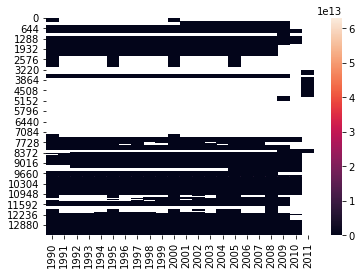

In [7]:
df.info()
sns.heatmap(df)

In [8]:
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29.57,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.21,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,4.97,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,2497175.68,2693642.26,2909756.36,3139637.32,3373929.85,3605264.94,3817581.27,4024280.62,4229363.05,4439791.45,...,5148619.31,5410331.21,5683412.00,5967457.83,6275723.04,6597265.19,6932788.71,7283068.41,7648699.45,nan
13508,18304000.00,18864881.58,19446091.55,20048481.07,20672940.24,21320400.00,21992135.78,22697594.56,23438682.55,24217429.97,...,26345562.75,26904362.60,27448218.30,27988692.12,28533559.52,29079838.13,29636881.56,30193795.83,30844632.10,nan
13509,10120930.83,10569454.39,11060046.85,11568627.56,12061489.85,12515132.80,12990617.19,13428559.42,13852037.72,14296499.99,...,16125336.27,16867832.79,17640845.61,18431987.56,19333729.39,20261443.14,21216476.38,22201848.32,23219959.84,nan
13510,3096860.88,3141668.30,3183257.23,3223514.67,3264940.18,3309118.18,3356931.52,3407475.82,3458431.12,3506647.55,...,3729882.68,3819640.74,3912870.73,4011827.75,4128986.90,4253139.48,4384858.57,4524564.08,4614728.01,nan


#### Put the numeric data back into the original dataframe to remove null values all togather

In [9]:
data[[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]]=df

#### Drop all null value rows if any 

In [10]:
# ax = sns.heatmap(data)
df.dropna(how='all')

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29.57,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.21,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,4.97,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,2497175.68,2693642.26,2909756.36,3139637.32,3373929.85,3605264.94,3817581.27,4024280.62,4229363.05,4439791.45,...,5148619.31,5410331.21,5683412.00,5967457.83,6275723.04,6597265.19,6932788.71,7283068.41,7648699.45,nan
13508,18304000.00,18864881.58,19446091.55,20048481.07,20672940.24,21320400.00,21992135.78,22697594.56,23438682.55,24217429.97,...,26345562.75,26904362.60,27448218.30,27988692.12,28533559.52,29079838.13,29636881.56,30193795.83,30844632.10,nan
13509,10120930.83,10569454.39,11060046.85,11568627.56,12061489.85,12515132.80,12990617.19,13428559.42,13852037.72,14296499.99,...,16125336.27,16867832.79,17640845.61,18431987.56,19333729.39,20261443.14,21216476.38,22201848.32,23219959.84,nan
13510,3096860.88,3141668.30,3183257.23,3223514.67,3264940.18,3309118.18,3356931.52,3407475.82,3458431.12,3506647.55,...,3729882.68,3819640.74,3912870.73,4011827.75,4128986.90,4253139.48,4384858.57,4524564.08,4614728.01,nan


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country code  13512 non-null  object 
 1   Country name  13512 non-null  object 
 2   Series code   13512 non-null  object 
 3   Series name   13512 non-null  object 
 4   SCALE         13512 non-null  object 
 5   Decimals      13512 non-null  object 
 6   1990          4854 non-null   float64
 7   1991          3497 non-null   float64
 8   1992          3653 non-null   float64
 9   1993          3717 non-null   float64
 10  1994          3779 non-null   float64
 11  1995          4672 non-null   float64
 12  1996          3804 non-null   float64
 13  1997          3767 non-null   float64
 14  1998          3818 non-null   float64
 15  1999          4005 non-null   float64
 16  2000          5496 non-null   float64
 17  2001          4018 non-null   float64
 18  2002          4057 non-nul

In [12]:
data.dropna(how='all')

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.21,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.97,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,YEM,"Yemen, Rep.",SP.URB.TOTL,Urban population,0,0,2497175.68,2693642.26,2909756.36,3139637.32,...,5148619.31,5410331.21,5683412.00,5967457.83,6275723.04,6597265.19,6932788.71,7283068.41,7648699.45,nan
13508,ZAF,South Africa,SP.URB.TOTL,Urban population,0,0,18304000.00,18864881.58,19446091.55,20048481.07,...,26345562.75,26904362.60,27448218.30,27988692.12,28533559.52,29079838.13,29636881.56,30193795.83,30844632.10,nan
13509,ZAR,"Congo, Dem. Rep.",SP.URB.TOTL,Urban population,0,0,10120930.83,10569454.39,11060046.85,11568627.56,...,16125336.27,16867832.79,17640845.61,18431987.56,19333729.39,20261443.14,21216476.38,22201848.32,23219959.84,nan
13510,ZMB,Zambia,SP.URB.TOTL,Urban population,0,0,3096860.88,3141668.30,3183257.23,3223514.67,...,3729882.68,3819640.74,3912870.73,4011827.75,4128986.90,4253139.48,4384858.57,4524564.08,4614728.01,nan


#### Drop the unnecessary columns

In [13]:
data.drop(columns=['SCALE', 'Decimals'], inplace=True)

In [14]:
data.head(10)

,Country code,Country name,Series code,Series name,1990,1991,1992,1993,1994,1995,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),29.57,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0.21,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),4.97,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,ARE,United Arab Emirates,AG.LND.EL5M.ZS,Land area below 5m (% of land area),4.64,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,ARG,Argentina,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1.23,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,ARM,Armenia,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,ASM,American Samoa,AG.LND.EL5M.ZS,Land area below 5m (% of land area),17.89,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,ATG,Antigua and Barbuda,AG.LND.EL5M.ZS,Land area below 5m (% of land area),32.42,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


#### Drop the data if row have more than 5 null values

In [15]:
data = data.dropna(thresh=5)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 13511
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country code  7891 non-null   object 
 1   Country name  7891 non-null   object 
 2   Series code   7891 non-null   object 
 3   Series name   7891 non-null   object 
 4   1990          4854 non-null   float64
 5   1991          3497 non-null   float64
 6   1992          3653 non-null   float64
 7   1993          3717 non-null   float64
 8   1994          3779 non-null   float64
 9   1995          4672 non-null   float64
 10  1996          3804 non-null   float64
 11  1997          3767 non-null   float64
 12  1998          3818 non-null   float64
 13  1999          4005 non-null   float64
 14  2000          5496 non-null   float64
 15  2001          4018 non-null   float64
 16  2002          4057 non-null   float64
 17  2003          4043 non-null   float64
 18  2004          4225 non-null

#### Make separate dataframe for numeric values to fill the other null or 0 values

In [17]:
df = data[[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 13511
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    4854 non-null   float64
 1   1991    3497 non-null   float64
 2   1992    3653 non-null   float64
 3   1993    3717 non-null   float64
 4   1994    3779 non-null   float64
 5   1995    4672 non-null   float64
 6   1996    3804 non-null   float64
 7   1997    3767 non-null   float64
 8   1998    3818 non-null   float64
 9   1999    4005 non-null   float64
 10  2000    5496 non-null   float64
 11  2001    4018 non-null   float64
 12  2002    4057 non-null   float64
 13  2003    4043 non-null   float64
 14  2004    4225 non-null   float64
 15  2005    5084 non-null   float64
 16  2006    4236 non-null   float64
 17  2007    4248 non-null   float64
 18  2008    4603 non-null   float64
 19  2009    3761 non-null   float64
 20  2010    2332 non-null   float64
 21  2011    658 non-null    float64
dtyp

<AxesSubplot:>

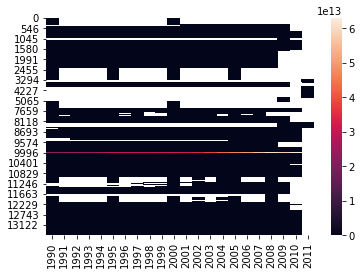

In [19]:
sns.heatmap(df)

In [20]:
df_trans = df.T

In [21]:
df = df_trans.fillna(df_trans.mean()).T

In [22]:
df.round(2)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29.57,29.57,29.57,29.57,29.57,29.57,29.57,29.57,29.57,29.57,...,29.57,29.57,29.57,29.57,29.57,29.57,29.57,29.57,29.57,29.57
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,...,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21
4,4.97,4.97,4.97,4.97,4.97,4.97,4.97,4.97,4.97,4.97,...,4.97,4.97,4.97,4.97,4.97,4.97,4.97,4.97,4.97,4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,2497175.68,2693642.26,2909756.36,3139637.32,3373929.86,3605264.94,3817581.27,4024280.62,4229363.05,4439791.45,...,5148619.31,5410331.21,5683412.00,5967457.83,6275723.04,6597265.19,6932788.71,7283068.41,7648699.45,4820853.77
13508,18304000.00,18864881.58,19446091.55,20048481.07,20672940.24,21320400.00,21992135.78,22697594.56,23438682.55,24217429.97,...,26345562.75,26904362.60,27448218.30,27988692.12,28533559.52,29079838.13,29636881.56,30193795.83,30844632.10,24703970.85
13509,10120930.83,10569454.39,11060046.85,11568627.56,12061489.85,12515132.80,12990617.19,13428559.42,13852037.72,14296499.99,...,16125336.27,16867832.79,17640845.61,18431987.56,19333729.39,20261443.14,21216476.38,22201848.32,23219959.84,15618136.34
13510,3096860.88,3141668.30,3183257.23,3223514.67,3264940.18,3309118.18,3356931.52,3407475.82,3458431.12,3506647.55,...,3729882.68,3819640.74,3912870.73,4011827.75,4128986.90,4253139.48,4384858.57,4524564.08,4614728.01,3691438.43


In [23]:
data[[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]] = df

In [24]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 13511
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country code  7891 non-null   object 
 1   Country name  7891 non-null   object 
 2   Series code   7891 non-null   object 
 3   Series name   7891 non-null   object 
 4   1990          7891 non-null   float64
 5   1991          7891 non-null   float64
 6   1992          7891 non-null   float64
 7   1993          7891 non-null   float64
 8   1994          7891 non-null   float64
 9   1995          7891 non-null   float64
 10  1996          7891 non-null   float64
 11  1997          7891 non-null   float64
 12  1998          7891 non-null   float64
 13  1999          7891 non-null   float64
 14  2000          7891 non-null   float64
 15  2001          7891 non-null   float64
 16  2002          7891 non-null   float64
 17  2003          7891 non-null   float64
 18  2004          7891 non-null

(  Country code Country name     Series code  \
 0          ABW        Aruba  AG.LND.EL5M.ZS   
 1          ADO      Andorra  AG.LND.EL5M.ZS   
 2          AFG  Afghanistan  AG.LND.EL5M.ZS   
 3          AGO       Angola  AG.LND.EL5M.ZS   
 4          ALB      Albania  AG.LND.EL5M.ZS   
 
                            Series name  1990  1991  1992  1993  1994  1995  \
 0  Land area below 5m (% of land area) 29.57 29.57 29.57 29.57 29.57 29.57   
 1  Land area below 5m (% of land area)  0.00  0.00  0.00  0.00  0.00  0.00   
 2  Land area below 5m (% of land area)  0.00  0.00  0.00  0.00  0.00  0.00   
 3  Land area below 5m (% of land area)  0.21  0.21  0.21  0.21  0.21  0.21   
 4  Land area below 5m (% of land area)  4.97  4.97  4.97  4.97  4.97  4.97   
 
    ...  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  
 0  ... 29.57 29.57 29.57 29.57 29.57 29.57 29.57 29.57 29.57 29.57  
 1  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
 2  ...  0.00  0.00  0.0

#### Total factors available that can possibly cause weather/temperature change

In [25]:
data['Series name'].value_counts()

Population                                                          233
Population growth (annual %)                                        232
Land area below 5m (% of land area)                                 227
Population below 5m (% of total)                                    227
Urban population                                                    222
Urban population growth (annual %)                                  221
Nationally terrestrial protected areas (% of total land area)       220
Physicians (per 1,000 people)                                       220
GDP ($)                                                             219
CO2 emissions per capita (metric tons)                              216
CO2 emissions, total (KtCO2)                                        216
GNI per capita (Atlas $)                                            215
Ratio of girls to boys in primary & secondary school (%)            214
Under-five mortality rate (per 1,000)                           

#### Read the supportive Temperature data from four different four files and merge them togather

In [26]:
df_temp_1901_1930 = pd.read_csv("temperature_1901_2016/1901-1930.csv")
df_temp_1931_1960 = pd.read_csv("temperature_1901_2016/1931-1960.csv")
df_temp_1961_1990 = pd.read_csv("temperature_1901_2016/1961-1990.csv")
df_temp_1991_2016 = pd.read_csv("temperature_1901_2016/1991-2016.csv")

In [27]:
df_temp = pd.concat([df_temp_1901_1930, df_temp_1931_1960, df_temp_1961_1990, df_temp_1991_2016])

In [28]:
df_temp

,Temperature - (Celsius),Year,Statistics,Country
0,-0.04,1901,Jan Average,Afghanistan
1,2.42,1901,Feb Average,Afghanistan
2,9.36,1901,Mar Average,Afghanistan
3,13.56,1901,Apr Average,Afghanistan
4,18.15,1901,May Average,Afghanistan
...,...,...,...,...
61147,18.76,2016,Aug Average,Zimbabwe
61148,22.99,2016,Sep Average,Zimbabwe
61149,25.87,2016,Oct Average,Zimbabwe
61150,25.85,2016,Nov Average,Zimbabwe


#### Read the supportive Rain Fall data from four different four files and merge them togather

In [29]:
df_rain_1901_1930 = pd.read_csv("rainfall_1901_2016/1901-1930.csv")
df_rain_1931_1960 = pd.read_csv("rainfall_1901_2016/1931-1960.csv")
df_rain_1961_1990 = pd.read_csv("rainfall_1901_2016/1961-1990.csv")
df_rain_1991_2016 = pd.read_csv("rainfall_1901_2016/1991-2016.csv")

In [30]:
df_rain = pd.concat([df_rain_1901_1930, df_rain_1931_1960, df_rain_1961_1990, df_rain_1991_2016])

In [31]:
df_rain

,Rainfall - (MM),Year,Statistics,Country
0,55.74,1901,Jan Average,Afghanistan
1,13.95,1901,Feb Average,Afghanistan
2,43.85,1901,Mar Average,Afghanistan
3,26.96,1901,Apr Average,Afghanistan
4,52.96,1901,May Average,Afghanistan
...,...,...,...,...
61147,2.04,2016,Aug Average,Zimbabwe
61148,0.48,2016,Sep Average,Zimbabwe
61149,9.13,2016,Oct Average,Zimbabwe
61150,72.95,2016,Nov Average,Zimbabwe


#### Merge Temperature and Rain Fall data

In [32]:
df_merge = pd.concat([df_temp, df_rain['Rainfall - (MM)']], axis=1)

In [33]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272832 entries, 0 to 61151
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1    Year                    272832 non-null  int64  
 2    Statistics              272832 non-null  object 
 3    Country                 272832 non-null  object 
 4   Rainfall - (MM)          272832 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.5+ MB


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

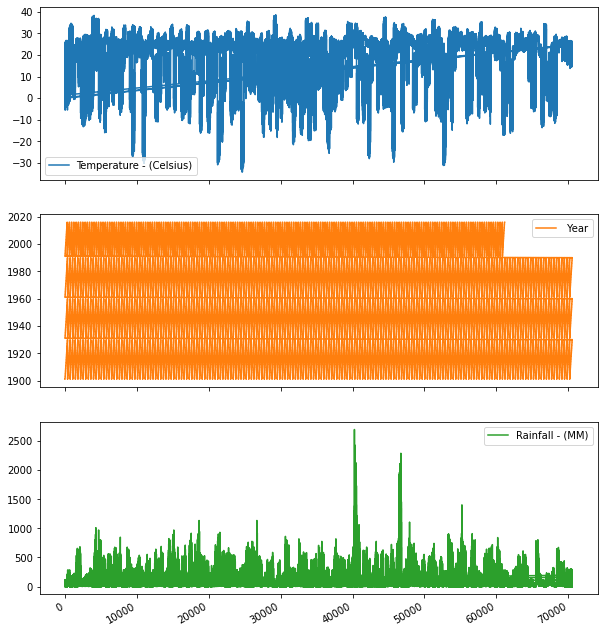

In [34]:
df_merge.plot(subplots=True, figsize=(10,12))

In [35]:
df_merge.columns = df_merge.columns.str.strip()

In [36]:
df_merge.Statistics = df_merge.Statistics.str.strip()
df_merge.Country = df_merge.Country.str.strip()

In [37]:
df_merge.columns

Index(['Temperature - (Celsius)', 'Year', 'Statistics', 'Country',
       'Rainfall - (MM)'],
      dtype='object')

<AxesSubplot:>

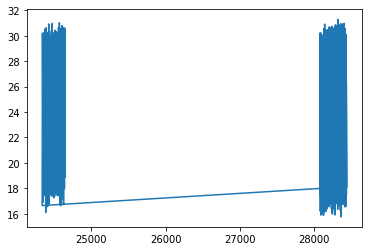

In [38]:
df_merge[df_merge['Country'] == "India"]['Temperature - (Celsius)'].plot()

<AxesSubplot:>

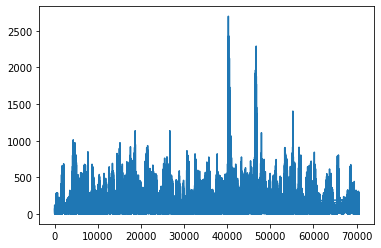

In [39]:
df_merge['Rainfall - (MM)'].plot()

### Country List

In [40]:
df_merge["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Democratic Republic of the)', 'Congo (Republic of the)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Federated States of Micronesia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'G

### Ask for the Country Name

In [41]:
Country_name = input("")

 United States


### Make the partition for the given country name

In [42]:
df_Country = df_merge[df_merge["Country"]==Country_name]
df_Country.head(3)

,Temperature - (Celsius),Year,Statistics,Country,Rainfall - (MM)
67320,-5.71,1901,Jan Average,United States,39.19
67321,-6.56,1901,Feb Average,United States,40.64
67322,-0.00,1901,Mar Average,United States,46.52


### Mean of the temperature and rainfall for the given country

In [43]:
df_Country_mean = df_Country.groupby("Year").mean()
df_Country_mean.head(3)

,Temperature - (Celsius),Rainfall - (MM)
Year,,
1901,6.69,49.54
1902,6.42,54.10
1903,6.04,51.02


### Remove the unnecessary keywords from statistics column to change the datatype from Object into DateTime

In [44]:
df_Country["Month"] = df_Country["Statistics"].str.rstrip("Average")
df_Country["Month"] = df_Country["Month"].str.strip()

In [45]:
df_Country.head()

,Temperature - (Celsius),Year,Statistics,Country,Rainfall - (MM),Month
67320,-5.71,1901,Jan Average,United States,39.19,Jan
67321,-6.56,1901,Feb Average,United States,40.64,Feb
67322,-0.00,1901,Mar Average,United States,46.52,Mar
67323,4.79,1901,Apr Average,United States,50.23,Apr
67324,12.08,1901,May Average,United States,53.46,May


### Combine two columns(Year, Month) to create one DateTime column

In [46]:
df_Country.index = pd.to_datetime(df_Country.Year.astype(str) + df_Country.Month, format="%Y%b")

### Drop unnecessary columns

In [47]:
df_Country = df_Country.drop(columns=['Year', 'Month', 'Statistics', 'Country'])

In [48]:
df_Country.head(3)

,Temperature - (Celsius),Rainfall - (MM)
1901-01-01,-5.71,39.19
1901-02-01,-6.56,40.64
1901-03-01,-0.00,46.52


<AxesSubplot:>

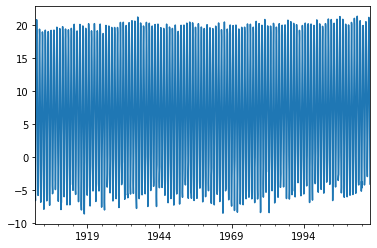

In [49]:
df_Country["Temperature - (Celsius)"].plot()

### Using ARIMA model to predict the seasonal forecast or future values 

### Use Auto ARIMA model to get the best parameters 

In [50]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(df_Country["Temperature - (Celsius)"], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.02 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4558.010, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4226.875, Time=1.55 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4556.370, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4524.127, Time=0.31 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4001.974, Time=7.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=16.90 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=4047.511, Time=5.16 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3993.660, Time=10.79 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=4216.065, Time=3.05 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=22.72 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.76 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=39

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1392
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1988.407
Date:                             Sun, 02 May 2021   AIC                           3986.814
Time:                                     09:33:44   BIC                           4012.964
Sample:                                          0   HQIC                          3996.597
                                            - 1392                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7131      0.076      9.410      0.000       0.565       0.862
ma.L1         -0.5592      0.087     -6.453      0.000      -0.729      -0.389
ar.S.L12      -0.6228      0.020    -31.312      0.000      -0.662      -0.584
ar.S.L24      -0.3906      0.020    -19.132      0.000      -0.431      -0.351
sigma2         1.0398      0.031     33.839      0.000       0.980       1.100
===================================================================================
Ljung-Box (Q):                      141.66   Jarque-Bera (JB):               121.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.13
Prob(H) (two-sided):                  0.25   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### The best parameters we had got from the above model

In [51]:
stepwise_fit.set_params()

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [52]:
train, test = train_test_split(df_Country["Temperature - (Celsius)"], test_size=0.1, shuffle=False)

In [53]:
train

1901-01-01   -5.71
1901-02-01   -6.56
1901-03-01   -0.00
1901-04-01    4.79
1901-05-01   12.08
              ... 
2004-12-01   -2.94
2005-01-01   -4.49
2005-02-01   -2.16
2005-03-01    1.37
2005-04-01    6.74
Name: Temperature - (Celsius), Length: 1252, dtype: float64

### Test size of the data

In [54]:
len(test)

140

### Train and fit the ARIMA model

In [55]:
model = ARIMA(train, seasonal_order=stepwise_fit.get_params()["seasonal_order"], order=stepwise_fit.get_params()["order"])

model_fit = model.fit()

print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:           Temperature - (Celsius)   No. Observations:                 1252
Model:             ARIMA(1, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1796.823
Date:                           Sun, 02 May 2021   AIC                           3603.646
Time:                                   09:33:48   BIC                           3629.260
Sample:                               01-01-1901   HQIC                          3613.279
                                    - 04-01-2005                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6595      0.098      6.706      0.000       0.467       0.852
ma.L1         -0.5155      0.109     -4.738

### Model Forcast for next 140 results

<AxesSubplot:>

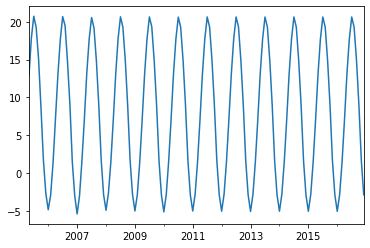

In [56]:
model_fit.forecast(140).plot()

### The actual data to be tested

<AxesSubplot:>

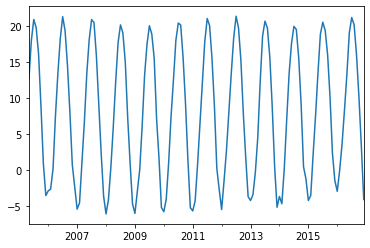

In [57]:
test.plot()

### Comparision of test and prediction values with plot

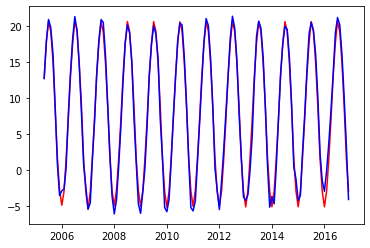

In [58]:
plt.plot(model_fit.forecast(140), color='red')
plt.plot(test, color='blue')
plt.show()

### Error in the prediction

In [59]:
print(mean_absolute_error(test, model_fit.forecast(140)))
print(mean_squared_error(test, model_fit.forecast(140)))

0.8060495371830236
0.994992519269239


### Implementation of ARMIA model for Temperature forecast

In [60]:
model = ARIMA(df_Country["Temperature - (Celsius)"], seasonal_order=stepwise_fit.get_params()["seasonal_order"], order=stepwise_fit.get_params()["order"])
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:           Temperature - (Celsius)   No. Observations:                 1392
Model:             ARIMA(1, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1988.407
Date:                           Sun, 02 May 2021   AIC                           3986.814
Time:                                   09:33:52   BIC                           4012.964
Sample:                               01-01-1901   HQIC                          3996.597
                                    - 12-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7131      0.076      9.410      0.000       0.565       0.862
ma.L1         -0.5592      0.087     -6.453

### KDE plot for the ARIMA model

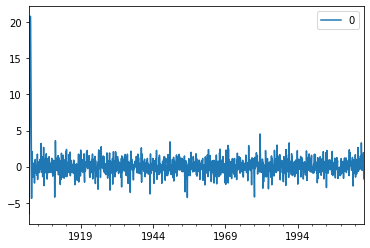

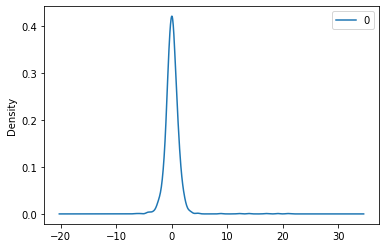

            0
count 1392.00
mean     0.08
std      1.48
min     -6.56
25%     -0.57
50%      0.03
75%      0.64
max     20.84


In [61]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

### Forecast Data

In [62]:
output = model_fit.forecast()
output

2017-01-01   -3.43
Freq: MS, dtype: float64

### Multiple Seasonal Forecast

In [63]:
output = model_fit.predict(start=1392,end=1450,dynamic=True)
output

2017-01-01   -3.43
2017-02-01   -2.58
2017-03-01    2.03
2017-04-01    7.67
2017-05-01   13.40
2017-06-01   18.45
2017-07-01   20.57
2017-08-01   19.76
2017-09-01   15.86
2017-10-01    9.79
2017-11-01    2.02
2017-12-01   -2.33
2018-01-01   -3.61
2018-02-01   -2.33
2018-03-01    2.51
2018-04-01    7.82
2018-05-01   13.44
2018-06-01   18.77
2018-07-01   20.71
2018-08-01   19.71
2018-09-01   15.97
2018-10-01   10.02
2018-11-01    2.47
2018-12-01   -2.38
2019-01-01   -3.30
2019-02-01   -1.47
2019-03-01    2.85
2019-04-01    7.99
2019-05-01   13.38
2019-06-01   18.81
2019-07-01   20.87
2019-08-01   19.91
2019-09-01   15.96
2019-10-01   10.03
2019-11-01    2.72
2019-12-01   -3.02
2020-01-01   -3.42
2020-02-01   -2.10
2020-03-01    2.45
2020-04-01    7.82
2020-05-01   13.40
2020-06-01   18.66
2020-07-01   20.72
2020-08-01   19.80
2020-09-01   15.92
2020-10-01    9.94
2020-11-01    2.39
2020-12-01   -2.60
2021-01-01   -3.46
2021-02-01   -2.05
2021-03-01    2.57
2021-04-01    7.86
2021-05-01  

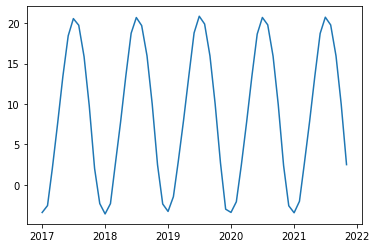

In [64]:
plt.plot(output)

### Residual plot diagnostics

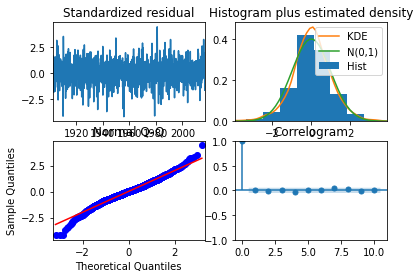

In [65]:
# Actual vs Fitted
model_fit.plot_diagnostics()
plt.show()

### Forecast the data until year 2026

In [66]:
future_data = model_fit.forecast(120)
future_data

2017-01-01   -3.43
2017-02-01   -2.58
2017-03-01    2.03
2017-04-01    7.67
2017-05-01   13.40
              ... 
2026-08-01   19.82
2026-09-01   15.94
2026-10-01    9.98
2026-11-01    2.50
2026-12-01   -2.68
Freq: MS, Length: 120, dtype: float64

### Make a dataframe to use it later on

In [67]:
future_data_df = pd.DataFrame(future_data, columns=["Temperature - (Celsius)"])
future_data_df

,Temperature - (Celsius)
2017-01-01,-3.43
2017-02-01,-2.58
2017-03-01,2.03
2017-04-01,7.67
2017-05-01,13.40
...,...
2026-08-01,19.82
2026-09-01,15.94
2026-10-01,9.98
2026-11-01,2.50


### Take average of temperature on Yearly basis

In [68]:
temper_df = df_Country

In [69]:
temper_df = temper_df.append(future_data_df)

In [70]:
temper_df = temper_df.drop(columns=["Rainfall - (MM)"])

In [71]:
temper_df["year"] = temper_df.index.year

In [72]:
temper_df

,Temperature - (Celsius),year
1901-01-01,-5.71,1901
1901-02-01,-6.56,1901
1901-03-01,-0.00,1901
1901-04-01,4.79,1901
1901-05-01,12.08,1901
...,...,...
2026-08-01,19.82,2026
2026-09-01,15.94,2026
2026-10-01,9.98,2026
2026-11-01,2.50,2026


In [73]:
temper_df = temper_df.groupby("year").mean()

### Country Code and Country Name List

In [74]:
print("Country Code----  Country Name\n")

for i in range(len(data["Country code"].unique())):

    print(data["Country code"].unique()[i] + "         ----  " + data["Country name"].unique()[i])

Country Code----  Country Name

ABW         ----  Aruba
ADO         ----  Andorra
AFG         ----  Afghanistan
AGO         ----  Angola
ALB         ----  Albania
ARE         ----  United Arab Emirates
ARG         ----  Argentina
ARM         ----  Armenia
ASM         ----  American Samoa
ATG         ----  Antigua and Barbuda
AUS         ----  Australia
AUT         ----  Austria
AZE         ----  Azerbaijan
BDI         ----  Burundi
BEL         ----  Belgium
BEN         ----  Benin
BFA         ----  Burkina Faso
BGD         ----  Bangladesh
BGR         ----  Bulgaria
BHR         ----  Bahrain
BHS         ----  Bahamas, The
BIH         ----  Bosnia and Herzegovina
BLR         ----  Belarus
BLZ         ----  Belize
BMU         ----  Bermuda
BOL         ----  Bolivia
BRA         ----  Brazil
BRB         ----  Barbados
BRN         ----  Brunei Darussalam
BTN         ----  Bhutan
BWA         ----  Botswana
CAF         ----  Central African Republic
CAN         ----  Canada
CHE         ----  

### Ask for the Country Code for specific country's analysis

In [75]:
Country_Code = input()

 usa


In [76]:
Country_Code = Country_Code.upper()

### Focus on the given country, and extract that country's data from dataframe

In [77]:
data_Country = data[data["Country code"] == Country_Code]
data_Country.head(3)

,Country code,Country name,Series code,Series name,1990,1991,1992,1993,1994,1995,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
218,USA,United States,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1.72,1.72,1.72,1.72,1.72,1.72,...,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72
684,USA,United States,AG.YLD.CREL.KG,Cereal yield (kg per hectare),4755.10,4510.20,5360.50,4301.10,5563.30,4644.70,...,5547.40,6024.00,6851.60,6451.00,6400.10,6704.30,6619.90,7238.40,5729.07,5729.07
917,USA,United States,BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",0.84,0.39,0.32,0.78,0.66,0.79,...,0.80,0.57,1.24,0.90,1.82,1.58,2.17,1.13,1.62,1.34


### Drop unnecessary columns

In [78]:
data_Country = data_Country.drop(['Country code', 'Country name', 'Series code'], axis = 1) 
data_Country.head(3)

,Series name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
218,Land area below 5m (% of land area),1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,...,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72
684,Cereal yield (kg per hectare),4755.10,4510.20,5360.50,4301.10,5563.30,4644.70,5177.40,5277.60,5676.10,...,5547.40,6024.00,6851.60,6451.00,6400.10,6704.30,6619.90,7238.40,5729.07,5729.07
917,"Foreign direct investment, net inflows (% of GDP)",0.84,0.39,0.32,0.78,0.66,0.79,1.12,1.28,2.05,...,0.80,0.57,1.24,0.90,1.82,1.58,2.17,1.13,1.62,1.34


### Set the dataframe index to series name

In [79]:
data_Country = data_Country.set_index("Series name")
data_Country.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Series name,,,,,,,,,,,,,,,,,,,,,
Land area below 5m (% of land area),1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,...,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72,1.72
Cereal yield (kg per hectare),4755.10,4510.20,5360.50,4301.10,5563.30,4644.70,5177.40,5277.60,5676.10,5732.90,...,5547.40,6024.00,6851.60,6451.00,6400.10,6704.30,6619.90,7238.40,5729.07,5729.07
"Foreign direct investment, net inflows (% of GDP)",0.84,0.39,0.32,0.78,0.66,0.79,1.12,1.28,2.05,3.11,...,0.80,0.57,1.24,0.90,1.82,1.58,2.17,1.13,1.62,1.34


### Plot of all the series data

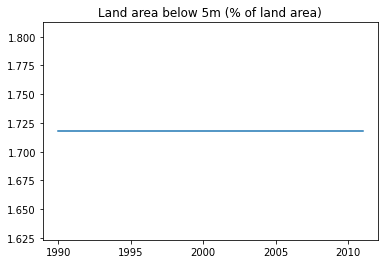

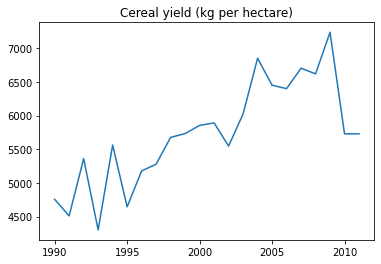

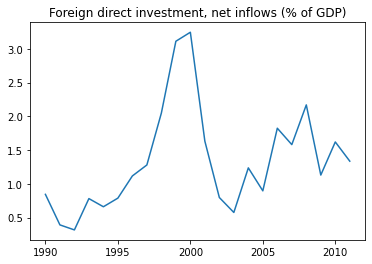

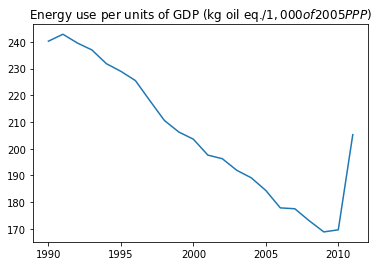

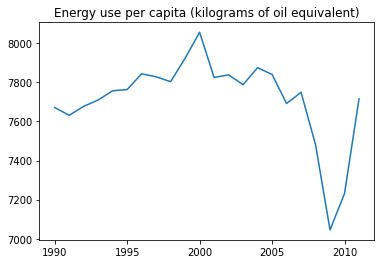

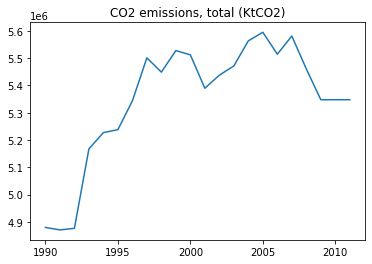

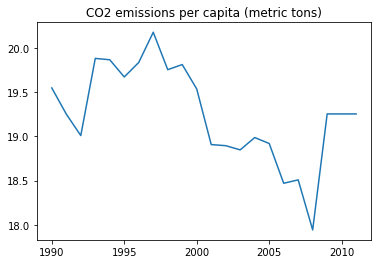

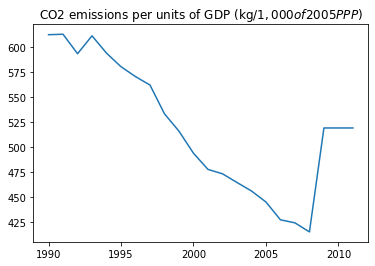

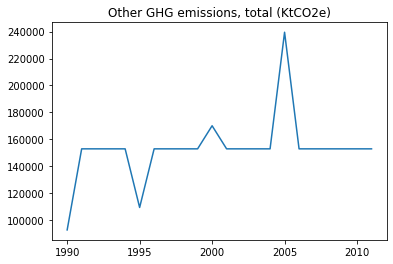

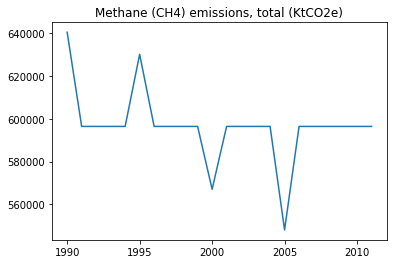

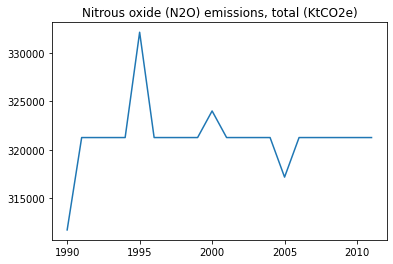

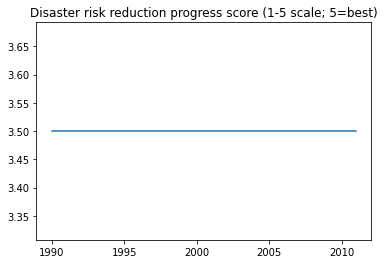

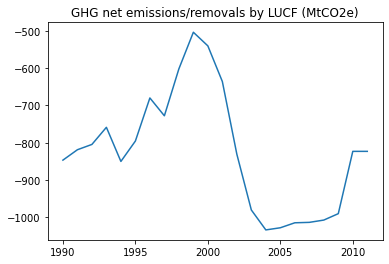

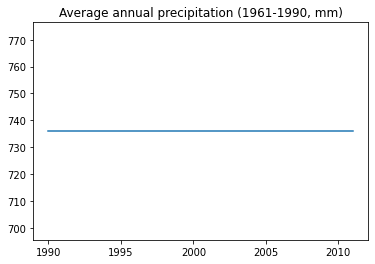

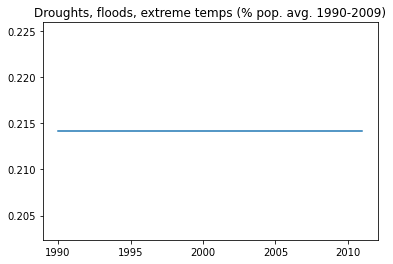

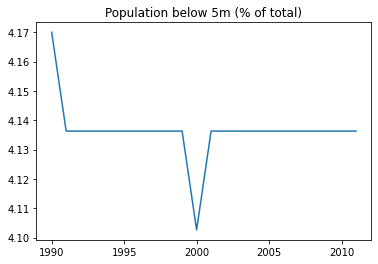

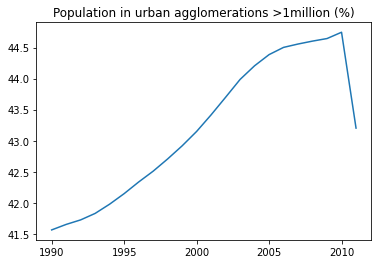

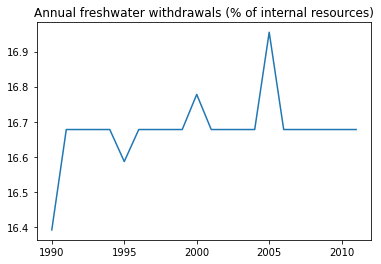

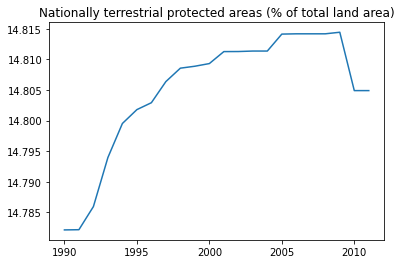

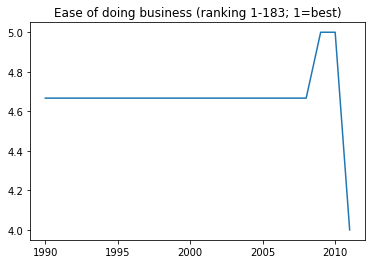

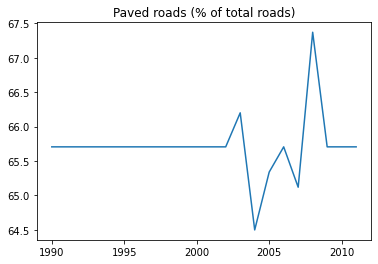

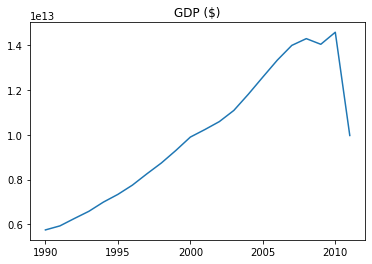

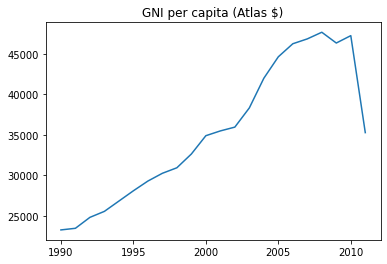

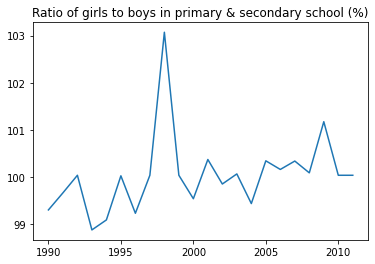

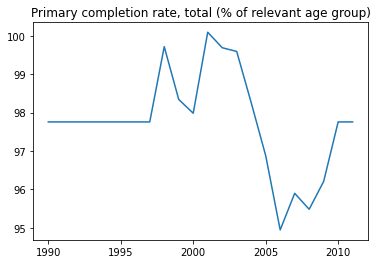

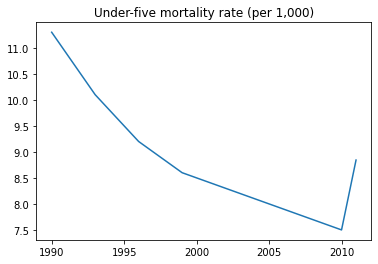

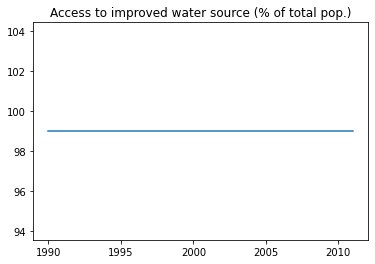

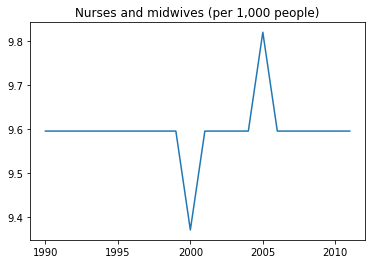

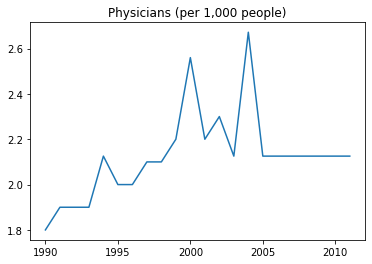

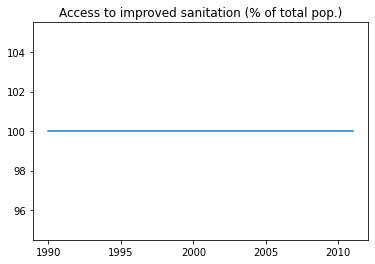

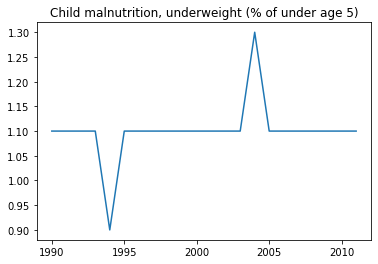

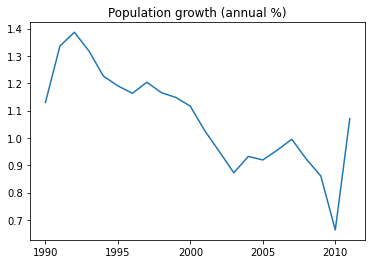

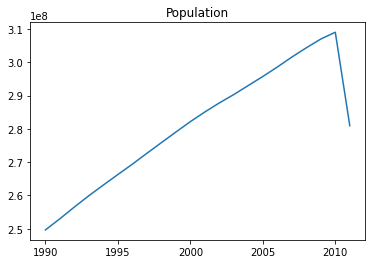

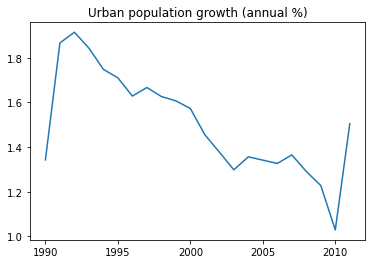

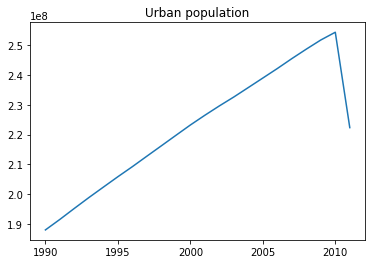

In [80]:
for i in range(data_Country.shape[0]):
    
#     plt.figure(figsize=(5,3))
    plt.title(data_Country.index[i])
    plt.plot(data_Country.iloc[i])
    plt.show()

## Regression Model

### Divide the X and Y variables to train and test the model
#### X = Year 1990-2010
#### Y = Year 2011

In [81]:
data_Country_X = data_Country[[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]]

In [82]:
data_Country_Y = data_Country[2011]

### Split the data for train and test dataset

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data_Country_X, data_Country_Y, test_size=0.1, random_state=42)

### Linear Regression Model 

In [84]:
reg = LinearRegression().fit(X_train, y_train)

In [85]:
reg.coef_

array([-0.22471984,  0.24396462,  0.12809912,  0.43246936,  0.24895779,
       -0.25819632, -0.8095178 ,  0.5354245 ,  0.1139714 ,  0.03660722,
       -0.21364059,  0.86540979, -1.2062196 ,  0.74996713,  0.557817  ,
       -0.24512513, -0.15036839,  0.02521732,  0.15077112, -0.5036624 ,
        0.52355625])

In [86]:
reg.intercept_

-0.0707312822341919

### Prediction of Year 2011 based on the historical data

In [87]:
y_predict = reg.predict(X_test)

In [88]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format})
# '%f%' % y_predic
np.array(y_predict)

array([99.01, 736.51, 100.33, 9986788291661.97])

In [89]:
y_test

Series name
Access to improved water source (% of total pop.)                     99.00
Average annual precipitation (1961-1990, mm)                         736.00
Primary completion rate, total (% of relevant age group)              97.76
GDP ($)                                                    9969809523809.52
Name: 2011, dtype: float64

### Measure explained variance score to evaluate the regression model
#### Best possible score is 1.0, lower values are worse.

In [90]:
explained_variance_score(y_test, y_predict)

0.9999970997287432

### Get more accuracy and error measures

In [91]:
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))
print(np.sqrt(mean_squared_error(y_test, y_predict)))

4244691963.8844266
7.206963944685734e+19
8489383926.225586


### Now let's apply this model for the whole dataset(all countries)

In [92]:
X = data[[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]]

In [93]:
y = data[2011]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [95]:
reg = LinearRegression().fit(X_train, y_train)

In [96]:
reg.coef_

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [97]:
reg.intercept_

-0.004974365234375

In [98]:
y_predict = reg.predict(X_test)

In [99]:
y_predict

array([1292.87, 51.60, 246.53, 9.95, 101.06, 4.58, 50.84, 280960705.52,
       60.56, 82.60, 15.87, 516.46, 1915.22, 250.00, 211925000.00, 0.56,
       93.34, 28.13, 1292.00, 31.65, 34667.19, 0.61, -0.00, 47566666.66,
       2522.10, 31094.25, 943.11, 3.90, -83.87, 259463182921.05, 5.45,
       -0.00, 227.10, 100.00, 2451990867602.89, 16190.00, 25680000.00,
       2.48, 0.68, 589.00, 40.35, 5566886.70, 1091883.74, 1925.00, 262.48,
       2.76, 788.00, 14.50, 1454096883.09, 6.34, 0.82, 99.00, 0.90,
       20521.17, 69272727.27, -0.00, 34.77, 453340601.50, 105.26, 79.86,
       43.87, 585.00, 14632.87, 6113982885825.28, 8583744.38, 37.63,
       12.62, 2768.88, 8550414942.43, 191.59, 8.81, 1.78, 100.00,
       245625.92, 54.90, 7.18, 4.00, 620978.80, 49758888.88, 9.45, 338.29,
       100.00, 22.00, 34.95, 0.26, 6102.51, 999860000.00, 0.18, 4.25,
       902.00, 100.00, 2.23, 99.29, 12.84, 3288.22, 92.75, 1.80,
       24474151531.06, 27726.00, 79.20, 30.18, 31.70, 3.69, 1308.73,
       61.

In [100]:
y_test

2513    1292.88
11055     51.60
2244     246.53
7407       9.96
10300    101.06
          ...  
11475      1.46
11601      1.43
4265    1220.00
1757    8466.46
937      100.00
Name: 2011, Length: 790, dtype: float64

### Got great explained variance score

In [101]:
explained_variance_score(y_test, y_predict)

1.0

### Less errors 

In [102]:
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))
print(np.sqrt(mean_squared_error(y_test, y_predict)))

0.09515070908343387
0.8520008788690543
0.9230389368109312


### Try ARIMA model to predict future values for specific country

In [103]:
data_Country = data_Country.T

### Make year as an index for better use in ARIMA model

In [104]:
data_Country.index = pd.to_datetime(data_Country.index, format='%Y')

In [105]:
data_Country.head(3)

Series name,Land area below 5m (% of land area),Cereal yield (kg per hectare),"Foreign direct investment, net inflows (% of GDP)","Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)",Energy use per capita (kilograms of oil equivalent),"CO2 emissions, total (KtCO2)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","Other GHG emissions, total (KtCO2e)","Methane (CH4) emissions, total (KtCO2e)",...,"Under-five mortality rate (per 1,000)",Access to improved water source (% of total pop.),"Nurses and midwives (per 1,000 people)","Physicians (per 1,000 people)",Access to improved sanitation (% of total pop.),"Child malnutrition, underweight (% of under age 5)",Population growth (annual %),Population,Urban population growth (annual %),Urban population
1990-01-01,1.72,4755.10,0.84,240.29,7671.55,4879376.21,19.55,612.26,92595.50,640428.40,...,11.30,99.00,9.59,1.80,100.00,1.10,1.13,249623000.00,1.34,187966119.00
1991-01-01,1.72,4510.20,0.39,242.89,7631.52,4870238.04,19.25,612.72,152853.47,596425.07,...,10.90,99.00,9.59,1.90,100.00,1.10,1.34,252981000.00,1.87,191506617.00
1992-01-01,1.72,5360.50,0.32,239.60,7677.39,4876006.23,19.01,593.24,152853.47,596425.07,...,10.50,99.00,9.59,1.90,100.00,1.10,1.39,256514000.00,1.91,195207154.00


### Try specific series data first 

In [106]:
Cereal_yield = data_Country["Cereal yield (kg per hectare)"]
Cereal_yield

1990-01-01   4755.10
1991-01-01   4510.20
1992-01-01   5360.50
1993-01-01   4301.10
1994-01-01   5563.30
1995-01-01   4644.70
1996-01-01   5177.40
1997-01-01   5277.60
1998-01-01   5676.10
1999-01-01   5732.90
2000-01-01   5854.20
2001-01-01   5891.50
2002-01-01   5547.40
2003-01-01   6024.00
2004-01-01   6851.60
2005-01-01   6451.00
2006-01-01   6400.10
2007-01-01   6704.30
2008-01-01   6619.90
2009-01-01   7238.40
2010-01-01   5729.07
2011-01-01   5729.07
Name: Cereal yield (kg per hectare), dtype: float64

### Try all parameters to get the best one for the model

In [107]:
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(Cereal_yield[:20], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=125.661, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=125.127, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=142.809, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=123.059, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=126.545, Time=0.14 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=124.761, Time=0.13 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=125.675, Time=0.13 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=138.890, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,1,0)[12] intercept
Total fit time: 1.867 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   20
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 -58.530
Date:                            Sun, 02 May 2021   AIC                            123.059
Time:                                    09:48:53   BIC                            123.297
Sample:                                         0   HQIC                           121.452
                                             - 20                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2541.0350    449.776      5.650      0.000    1659.489    3422.581
ar.L1         -0.6347      0.296     -2.147      0.032      -1.214      -0.055
sigma2      1.443e+05   1.23e+05      1.171      0.242   -9.73e+04    3.86e+05
===================================================================================
Ljung-Box (Q):                        6.95   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.43   Prob(JB):                         0.76
Heteroskedasticity (H):               0.38   Skew:                             0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         1.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### The best parameters we got

In [108]:
stepwise_fit.set_params

<bound method BaseEstimator.set_params of ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)>

### fit the data into the model

In [109]:
model = ARIMA(Cereal_yield[:20], seasonal_order=stepwise_fit.get_params()["seasonal_order"], order=stepwise_fit.get_params()["order"])

model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:     Cereal yield (kg per hectare)   No. Observations:                   20
Model:              ARIMA(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 -67.445
Date:                           Sun, 02 May 2021   AIC                            138.890
Time:                                   09:48:53   BIC                            139.049
Sample:                               01-01-1990   HQIC                           137.819
                                    - 01-01-2009                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5319      0.147      3.611      0.000       0.243       0.821
sigma2      9.964e+05    9.4e+05      1.060

### Residual Plotting

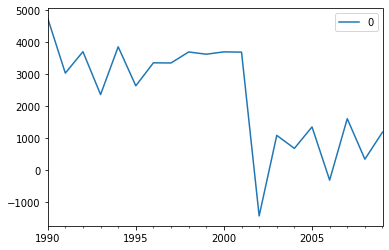

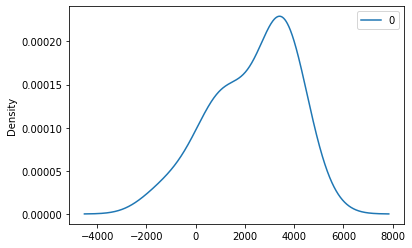

             0
count    20.00
mean   2319.20
std    1656.70
min   -1425.95
25%    1168.30
50%    2840.99
75%    3696.58
max    4755.10


In [110]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

### Next year forecast

In [111]:
output = model_fit.forecast(2)
output

2010-01-01   6718.97
2011-01-01   6287.56
Freq: AS-JAN, dtype: float64

### Turns out, the more data I have the much better prediction for future.

In [112]:
Cereal_yield[20:]

2010-01-01   5729.07
2011-01-01   5729.07
Name: Cereal yield (kg per hectare), dtype: float64

### Next several years forecast

In [113]:
output_many = model_fit.predict(start=20,end=26,dynamic=True)
output_many

2010-01-01   6718.97
2011-01-01   6287.56
2012-01-01   6149.20
2013-01-01   6048.40
2014-01-01   5630.85
2015-01-01   6068.38
2016-01-01   6875.20
Freq: AS-JAN, dtype: float64

### 

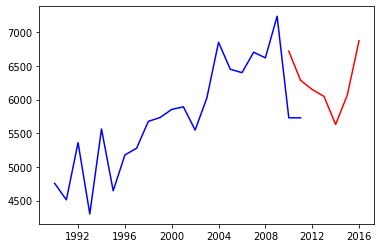

In [114]:
plt.plot(output_many, color='red')
plt.plot(Cereal_yield, color='blue')
plt.show()

In [115]:

def model_arima(series_name):
        
    temp_df = data_Country[series_name]
    stepwise_fit = auto_arima(temp_df[:20], start_p = 1, start_q = 1,
                              max_p = 3, max_q = 3, m = 12,
                              start_P = 0, seasonal = True,
                              d = None, D = 1, trace = True,
                              error_action ='ignore',   # we don't want to know if an order does not work
                              suppress_warnings = True,  # we don't want convergence warnings
                              stepwise = True)           # set to stepwise

    model = ARIMA(temp_df[:20], seasonal_order=stepwise_fit.get_params()["seasonal_order"], order=stepwise_fit.get_params()["order"])
    model_fit = model.fit()

    output_many = model_fit.predict(start=20,end=26,dynamic=True)

    plt.plot(output_many, color='red')
    plt.plot(temp_df, color='blue')
    plt.show()

In [116]:
data_Country.columns

Index(['Land area below 5m (% of land area)', 'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Average annual precipitation (1961-1990, mm)',
       'Droughts, floods, extreme temps (% pop. avg. 1990-2009)',
       'Population below 5m (% of total)',
       'Population in urban agglomerations >1million (%)',
       'Annual freshwater withdrawals (% of internal resources)',
       '

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=220.285, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=226.153, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=239.151, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=230.767, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=237.383, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=219.157, Time=0.19 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=220.537, Time=0.58 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=223.404, Time=0.75 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=231.044, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=301.971, Time=0.03 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=nan, Time=0.09 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=287.207, Time=0.04 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=inf

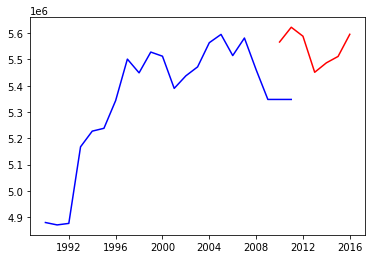

In [117]:
model_arima('CO2 emissions, total (KtCO2)')

### Try to predict the next year data, and with use of that and the previous data again predict the next data, and then again use that and previous data to predict the next, for better accuracy

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=164.585, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=168.669, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=168.537, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=175.779, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=166.563, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=166.669, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=166.560, Time=0.09 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.465 seconds
2012-01-01   5854.20
Freq: AS-JAN, dtype: float64
2013-01-01   5891.50
Freq: AS-JAN, dtype: float64
2014-01-01   5547.40
Freq: AS-JAN, dtype: float64
2015-01-01   6024.0

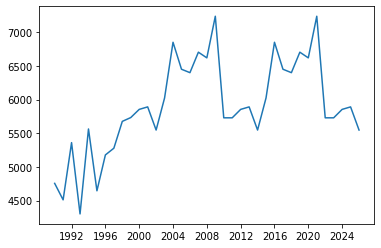

In [118]:
Cereal_yield = data_Country["Cereal yield (kg per hectare)"]

stepwise_fit = auto_arima(Cereal_yield, start_p = 1, start_q = 1,
                              max_p = 3, max_q = 3, m = 12,
                              start_P = 0, seasonal = True,
                              d = None, D = 1, trace = True,
                              error_action ='ignore',   # we don't want to know if an order does not work
                              suppress_warnings = True,  # we don't want convergence warnings
                              stepwise = True)           # set to stepwise


for i in range(15):
    
    model = ARIMA(Cereal_yield, seasonal_order=stepwise_fit.get_params()["seasonal_order"], order=stepwise_fit.get_params()["order"])
    model_fit = model.fit()

    output = model_fit.forecast()
    print(output)
    Cereal_yield= Cereal_yield.append(output)

plt.plot(Cereal_yield)
plt.show()

### Final predicted data until 2016

In [119]:
Cereal_yield

1990-01-01   4755.10
1991-01-01   4510.20
1992-01-01   5360.50
1993-01-01   4301.10
1994-01-01   5563.30
1995-01-01   4644.70
1996-01-01   5177.40
1997-01-01   5277.60
1998-01-01   5676.10
1999-01-01   5732.90
2000-01-01   5854.20
2001-01-01   5891.50
2002-01-01   5547.40
2003-01-01   6024.00
2004-01-01   6851.60
2005-01-01   6451.00
2006-01-01   6400.10
2007-01-01   6704.30
2008-01-01   6619.90
2009-01-01   7238.40
2010-01-01   5729.07
2011-01-01   5729.07
2012-01-01   5854.20
2013-01-01   5891.50
2014-01-01   5547.40
2015-01-01   6024.00
2016-01-01   6851.60
2017-01-01   6451.00
2018-01-01   6400.10
2019-01-01   6704.30
2020-01-01   6619.90
2021-01-01   7238.40
2022-01-01   5729.07
2023-01-01   5729.07
2024-01-01   5854.20
2025-01-01   5891.50
2026-01-01   5547.40
dtype: float64

### Now, Try that method for all series data for a specific country

In [120]:
data_Country_pred = pd.DataFrame()

for col in data_Country.columns:
    
#     print(col)
    Series_name = data_Country[col]
    stepwise_fit = auto_arima(Series_name, start_p = 1, start_q = 1,
                              max_p = 3, max_q = 3, m = 12,
                              start_P = 0, seasonal = True,
                              d = None, D = 1, trace = True,
                              error_action ='ignore',   # we don't want to know if an order does not work
                              suppress_warnings = True,  # we don't want convergence warnings
                              stepwise = True)           # set to stepwise
    
    
    for i in range(15):

        model = ARIMA(Series_name, seasonal_order=stepwise_fit.get_params()["seasonal_order"], order=stepwise_fit.get_params()["order"])
        model_fit = model.fit()

        output = model_fit.forecast()

        Series_name= Series_name.append(output)
    
    data_Country_pred[col] = Series_name
    print("Prediction for " + col + " completed")

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.243, Time=0.01 sec
Total fit time: 0.012 seconds
Prediction for Land area below 5m (% of land area) completed
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=164.585, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=168.669, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=168.537, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=175.779, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=166.563, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=166.669, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=166.560, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.509 seconds
Prediction for

### How the predicted data looks

In [121]:
data_Country_pred.tail(7)

,Land area below 5m (% of land area),Cereal yield (kg per hectare),"Foreign direct investment, net inflows (% of GDP)","Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)",Energy use per capita (kilograms of oil equivalent),"CO2 emissions, total (KtCO2)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","Other GHG emissions, total (KtCO2e)","Methane (CH4) emissions, total (KtCO2e)",...,"Under-five mortality rate (per 1,000)",Access to improved water source (% of total pop.),"Nurses and midwives (per 1,000 people)","Physicians (per 1,000 people)",Access to improved sanitation (% of total pop.),"Child malnutrition, underweight (% of under age 5)",Population growth (annual %),Population,Urban population growth (annual %),Urban population
2020-01-01,1.72,6619.90,2.17,172.97,7489.25,5465209.25,17.94,416.43,152853.47,596425.07,...,7.94,99.00,9.59,2.13,100.00,1.10,0.92,304375000.00,1.29,248674375.00
2021-01-01,1.72,7238.40,1.13,168.81,7049.82,5351047.91,19.25,520.38,152853.47,596425.07,...,7.84,99.00,9.59,2.13,100.00,1.10,0.86,307007000.00,1.23,251745740.00
2022-01-01,1.72,5729.07,1.62,169.59,7231.49,5350299.01,19.25,520.30,152853.47,596425.07,...,7.74,99.00,9.59,2.13,100.00,1.10,0.66,309050816.00,1.03,254348821.57
2023-01-01,1.72,5729.07,1.34,205.25,7716.15,5349724.31,19.25,520.21,152853.47,596425.07,...,9.09,99.00,9.59,2.13,100.00,1.10,1.07,280960705.52,1.50,222315103.64
2024-01-01,1.72,5854.20,3.25,203.56,7997.72,5548744.80,19.57,497.78,170020.30,567074.50,...,8.99,99.00,9.37,2.56,100.00,1.10,1.12,282172000.00,1.73,223198052.00
2025-01-01,1.72,5891.50,1.63,197.60,7812.72,5417820.48,18.89,481.27,152853.47,596425.07,...,8.89,99.00,9.59,2.20,100.00,1.10,1.03,285082000.00,1.45,226469140.80
2026-01-01,1.72,5547.40,0.80,196.24,7873.34,5459219.96,18.91,476.59,152853.47,596425.07,...,8.79,99.00,9.59,2.30,100.00,1.10,0.95,287804000.00,1.38,229610031.20


### Now, let's combine the two dataset we have to start working on our hypothesis

In [122]:
df_Country_mean.index = pd.to_datetime(df_Country_mean.index, format='%Y')

### Merge the data with the same index 

In [123]:
temper_df.index = pd.to_datetime(temper_df.index, format='%Y')

In [124]:
merged_Df = data_Country_pred.merge(temper_df, left_index=True, right_index=True)

In [125]:
merged_Df.tail(4)

,Land area below 5m (% of land area),Cereal yield (kg per hectare),"Foreign direct investment, net inflows (% of GDP)","Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)",Energy use per capita (kilograms of oil equivalent),"CO2 emissions, total (KtCO2)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","Other GHG emissions, total (KtCO2e)","Methane (CH4) emissions, total (KtCO2e)",...,Access to improved water source (% of total pop.),"Nurses and midwives (per 1,000 people)","Physicians (per 1,000 people)",Access to improved sanitation (% of total pop.),"Child malnutrition, underweight (% of under age 5)",Population growth (annual %),Population,Urban population growth (annual %),Urban population,Temperature - (Celsius)
2023-01-01,1.72,5729.07,1.34,205.25,7716.15,5349724.31,19.25,520.21,152853.47,596425.07,...,99.00,9.59,2.13,100.00,1.10,1.07,280960705.52,1.50,222315103.64,8.62
2024-01-01,1.72,5854.20,3.25,203.56,7997.72,5548744.80,19.57,497.78,170020.30,567074.50,...,99.00,9.37,2.56,100.00,1.10,1.12,282172000.00,1.73,223198052.00,8.63
2025-01-01,1.72,5891.50,1.63,197.60,7812.72,5417820.48,18.89,481.27,152853.47,596425.07,...,99.00,9.59,2.20,100.00,1.10,1.03,285082000.00,1.45,226469140.80,8.63
2026-01-01,1.72,5547.40,0.80,196.24,7873.34,5459219.96,18.91,476.59,152853.47,596425.07,...,99.00,9.59,2.30,100.00,1.10,0.95,287804000.00,1.38,229610031.20,8.63


### Plotting of the series data vs temperature for year 1990-2026 for a specific country

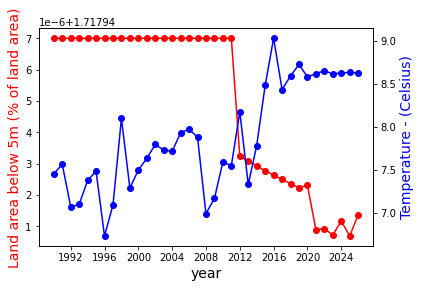

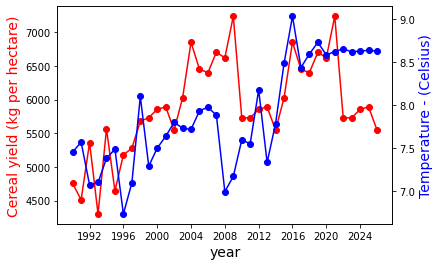

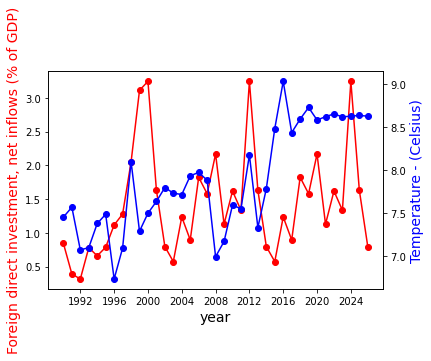

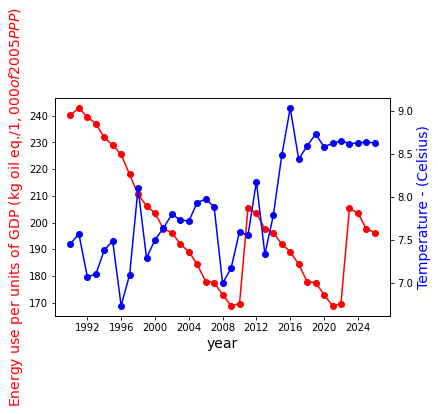

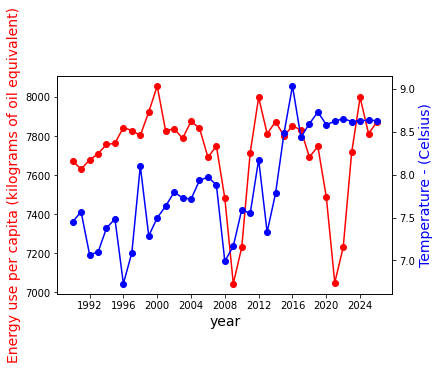

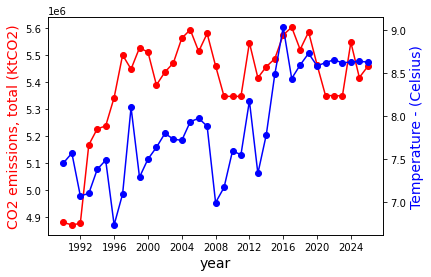

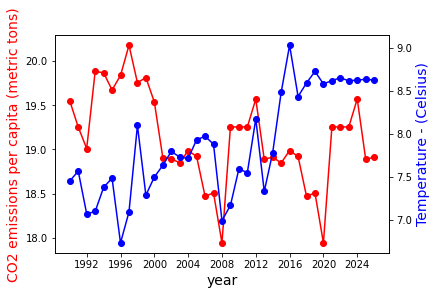

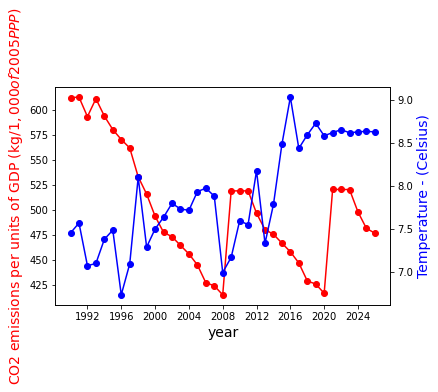

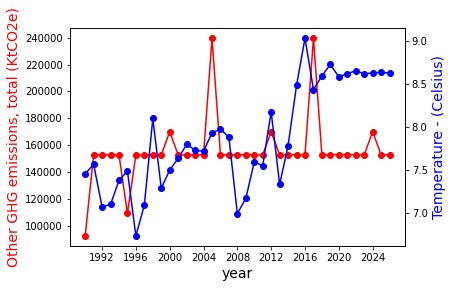

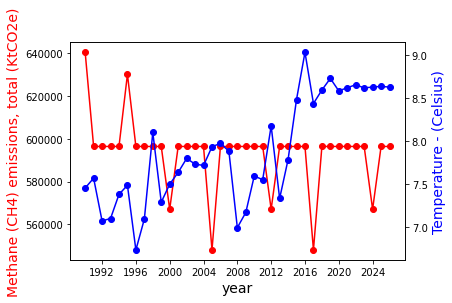

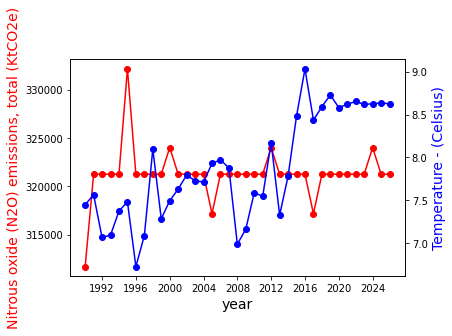

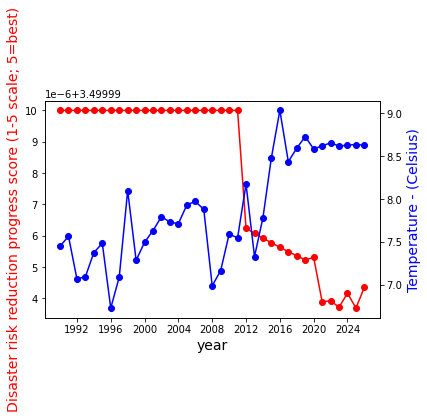

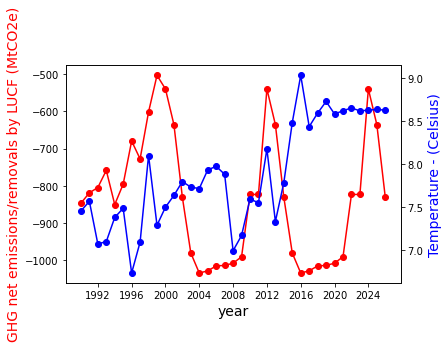

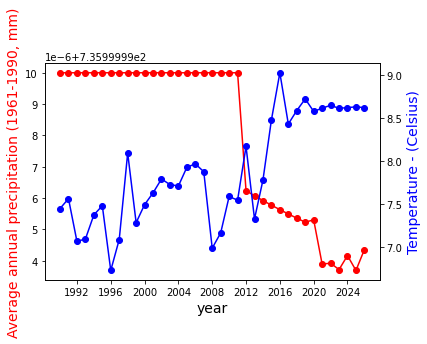

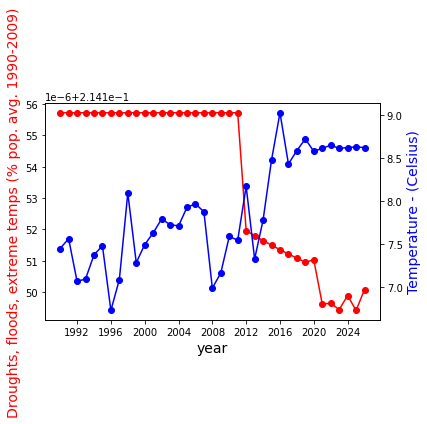

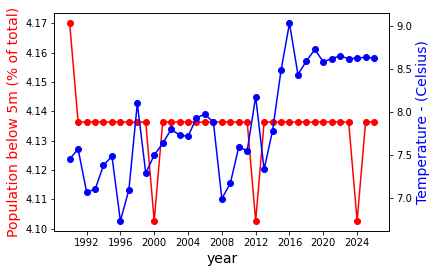

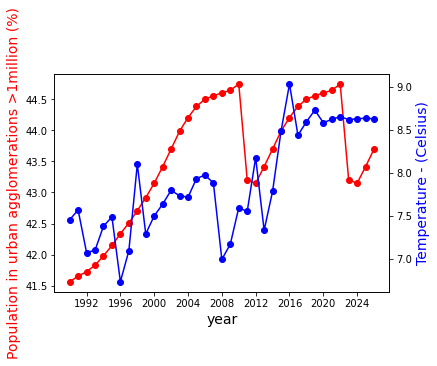

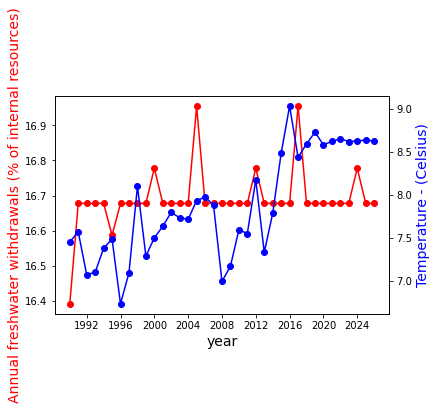

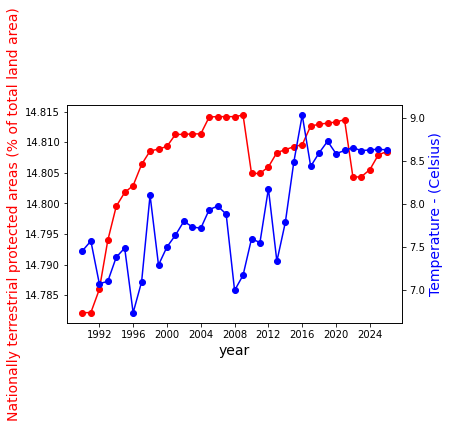

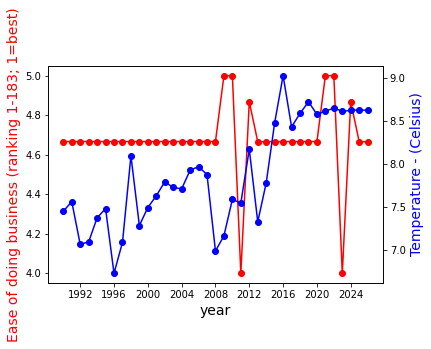

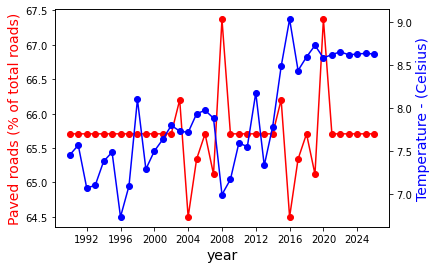

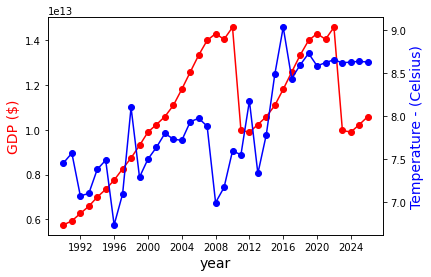

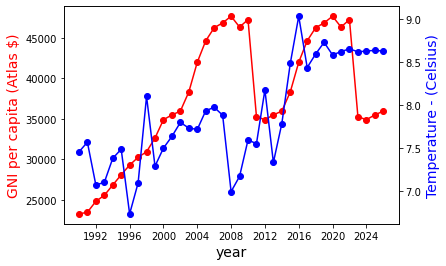

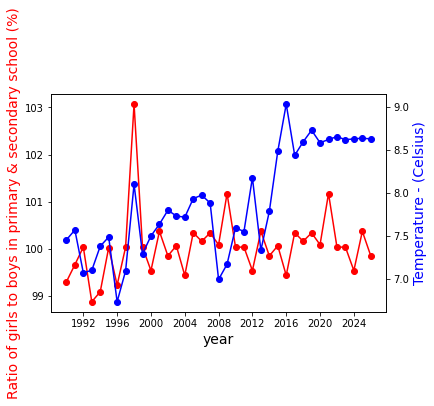

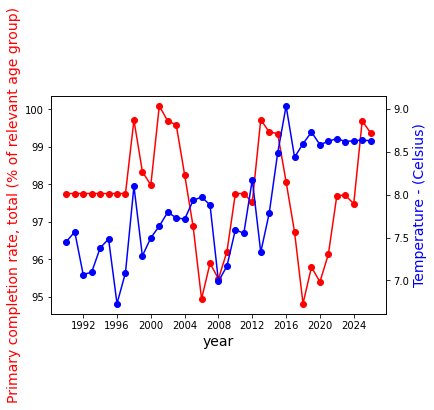

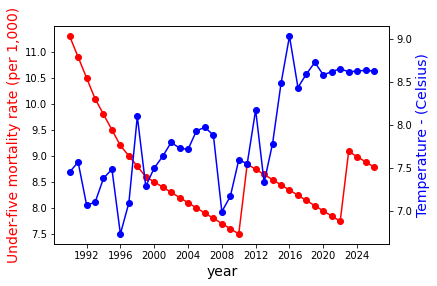

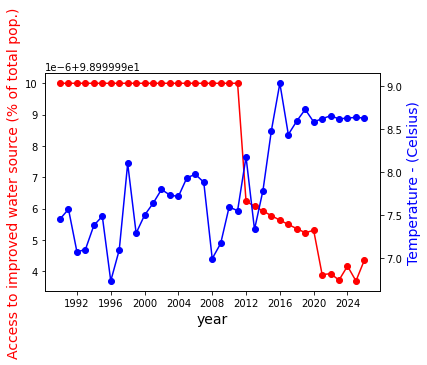

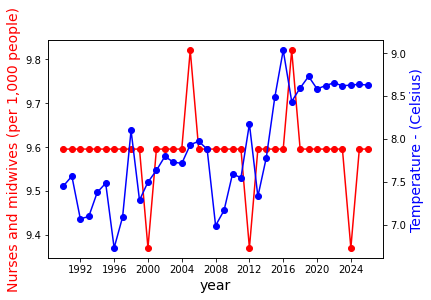

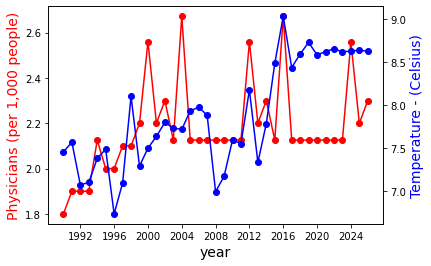

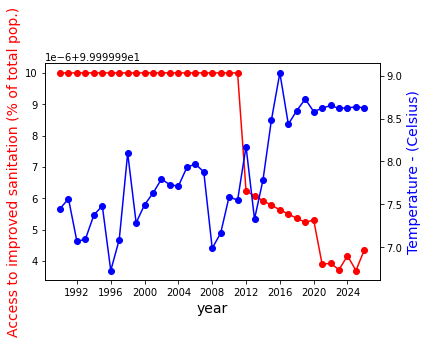

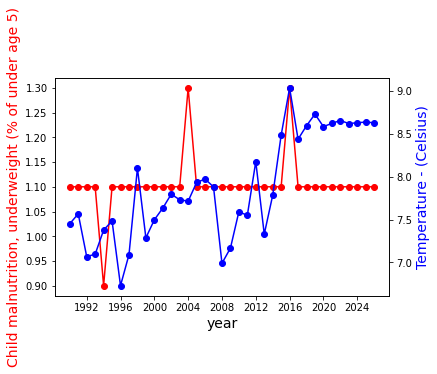

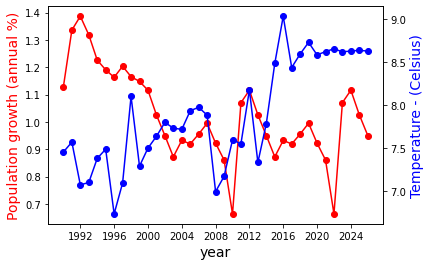

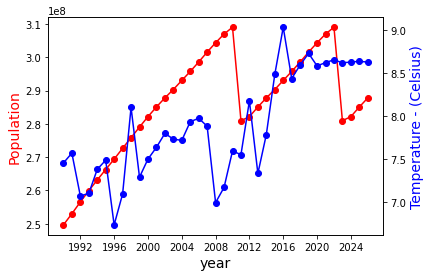

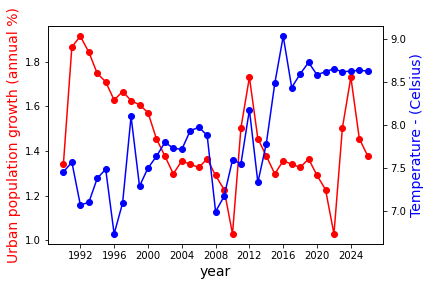

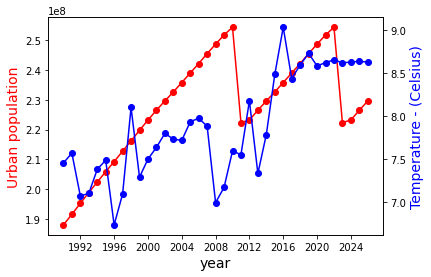

In [126]:
for col in data_Country_pred.columns:

    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(data_Country_pred[col], color="red", marker="o")
    # set x-axis label
    ax.set_xlabel("year",fontsize=14)
    # set y-axis label
    ax.set_ylabel(col,color="red",fontsize=14)

    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(merged_Df['Temperature - (Celsius)'],color="blue",marker="o")
    ax2.set_ylabel("Temperature - (Celsius)",color="blue",fontsize=14)
#     plt.show()
    # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#             dpi=100,
#             bbox_inches='tight')
#     plt.title(col)
    plt.show()

### Correlation(Pearson's R, Spearman's RHO, Kendall's TAU) between Temperature and Series name

#### The value is in the range [-1,1]. Value 1 indicates the positive relation and value -1 indicates negative relationship.

In [127]:
corr_df = pd.DataFrame(columns=["Series Name", "Pearson_R", "Spearman_rho", "kendall_tau"])
for col in data_Country_pred.columns:
    
    var = data_Country_pred[col].corr(merged_Df['Temperature - (Celsius)'])
    var_spearman = data_Country_pred[col].corr(merged_Df['Temperature - (Celsius)'], method='spearman')
    var_kendall = data_Country_pred[col].corr(merged_Df['Temperature - (Celsius)'], method='kendall')
    
    corr_df = corr_df.append({'Series Name' : col, "Pearson_R" : var, "Spearman_rho" : var_spearman, "kendall_tau" : var_kendall}, ignore_index=True)
corr_df

,Series Name,Pearson_R,Spearman_rho,kendall_tau
0,Land area below 5m (% of land area),-0.82,-0.79,-0.63
1,Cereal yield (kg per hectare),0.42,0.41,0.29
2,"Foreign direct investment, net inflows (% of GDP)",0.14,0.21,0.15
3,"Energy use per units of GDP (kg oil eq./$1,000...",-0.48,-0.46,-0.33
4,Energy use per capita (kilograms of oil equiva...,-0.00,0.09,0.05
5,"CO2 emissions, total (KtCO2)",0.42,0.47,0.33
6,CO2 emissions per capita (metric tons),-0.36,-0.37,-0.29
7,"CO2 emissions per units of GDP (kg/$1,000 of 2...",-0.49,-0.41,-0.30
8,"Other GHG emissions, total (KtCO2e)",0.20,0.23,0.18
9,"Methane (CH4) emissions, total (KtCO2e)",-0.22,-0.23,-0.18


<AxesSubplot:>

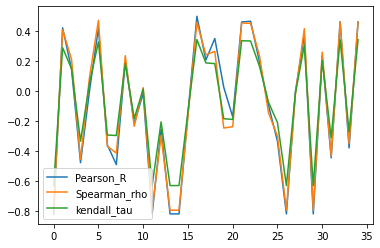

In [128]:
corr_df.plot()

### If we only look for the strong relationship, consider the correlation coefficient in the range [-0.4, 0.4].

In [129]:
corr_df.query("Pearson_R >= 0.4 or Pearson_R <= -0.4")

,Series Name,Pearson_R,Spearman_rho,kendall_tau
0,Land area below 5m (% of land area),-0.82,-0.79,-0.63
1,Cereal yield (kg per hectare),0.42,0.41,0.29
3,"Energy use per units of GDP (kg oil eq./$1,000...",-0.48,-0.46,-0.33
5,"CO2 emissions, total (KtCO2)",0.42,0.47,0.33
7,"CO2 emissions per units of GDP (kg/$1,000 of 2...",-0.49,-0.41,-0.30
11,Disaster risk reduction progress score (1-5 sc...,-0.82,-0.79,-0.63
13,"Average annual precipitation (1961-1990, mm)",-0.82,-0.79,-0.63
14,"Droughts, floods, extreme temps (% pop. avg. 1...",-0.82,-0.79,-0.63
16,Population in urban agglomerations >1million (%),0.50,0.46,0.34
21,GDP ($),0.46,0.45,0.33


#### From the above table I can say that as Population, CO2 emissions increases the temperature increases(positive correlation).